## 1. Подготовка данных

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
df = pd.read_csv('diabetes.csv')

In [8]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nРазмер обучающей выборки: {X_train.shape[0]} строк")
print(f"Размер тестовой выборки: {X_test.shape[0]} строк")


Размер обучающей выборки: 614 строк
Размер тестовой выборки: 154 строк


## 3. XGBoost

### 3.1 Исследование времени обучения и качества XGBoost


--- Набор параметров XGBoost #1 ---
{'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 2, 'subsample': 0.8, 'colsample_bytree': 0.8, 'objective': 'binary:logistic', 'eval_metric': 'logloss', 'random_state': 42}
Точность XGBoost: 0.7532
Время обучения XGBoost: 0.06 сек
Отчет по классификации XGBoost:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.67      0.57      0.62        54

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154

Матрица ошибок XGBoost:


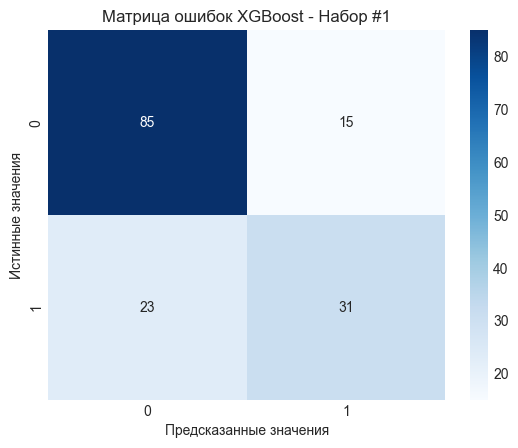


--- Набор параметров XGBoost #2 ---
{'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.8, 'colsample_bytree': 0.8, 'objective': 'binary:logistic', 'eval_metric': 'logloss', 'random_state': 42}
Точность XGBoost: 0.7468
Время обучения XGBoost: 0.03 сек
Отчет по классификации XGBoost:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       100
           1       0.65      0.59      0.62        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154

Матрица ошибок XGBoost:


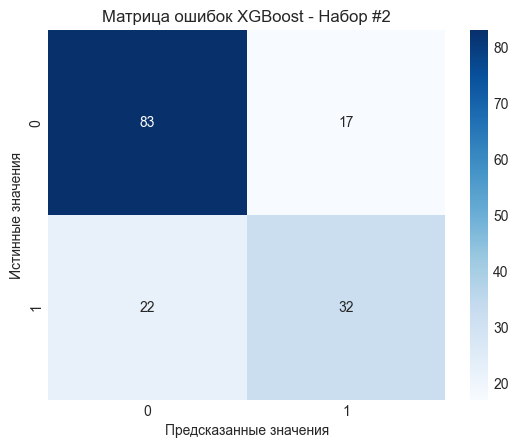


--- Набор параметров XGBoost #3 ---
{'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 4, 'subsample': 0.7, 'colsample_bytree': 0.7, 'objective': 'binary:logistic', 'eval_metric': 'logloss', 'random_state': 42}
Точность XGBoost: 0.7403
Время обучения XGBoost: 0.06 сек
Отчет по классификации XGBoost:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       100
           1       0.62      0.65      0.64        54

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154

Матрица ошибок XGBoost:


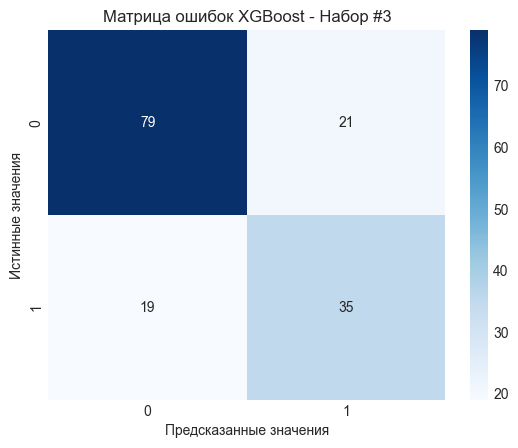


--- Набор параметров XGBoost #4 ---
{'n_estimators': 300, 'learning_rate': 0.01, 'max_depth': 5, 'subsample': 0.9, 'colsample_bytree': 0.9, 'objective': 'binary:logistic', 'eval_metric': 'logloss', 'random_state': 42}
Точность XGBoost: 0.7662
Время обучения XGBoost: 0.10 сек
Отчет по классификации XGBoost:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       100
           1       0.70      0.57      0.63        54

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154

Матрица ошибок XGBoost:


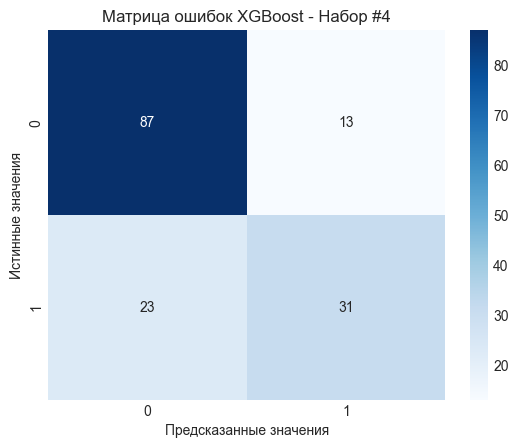


--- Набор параметров XGBoost #5 ---
{'n_estimators': 150, 'learning_rate': 0.2, 'max_depth': 2, 'subsample': 1.0, 'colsample_bytree': 1.0, 'objective': 'binary:logistic', 'eval_metric': 'logloss', 'random_state': 42}
Точность XGBoost: 0.7468
Время обучения XGBoost: 0.03 сек
Отчет по классификации XGBoost:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       100
           1       0.65      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154

Матрица ошибок XGBoost:


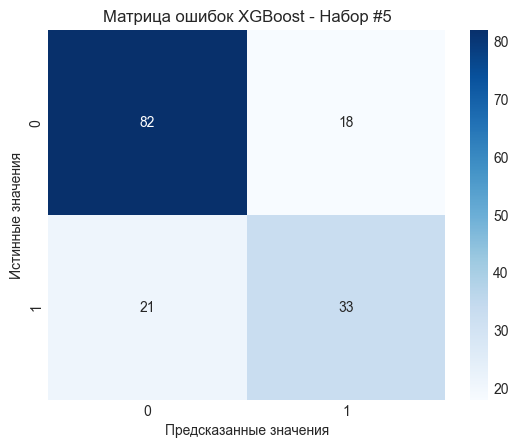


--- Сводка результатов XGBoost ---
   params_set  accuracy      time
0           1  0.753247  0.056742
1           2  0.746753  0.026817
2           3  0.740260  0.055289
3           4  0.766234  0.103736
4           5  0.746753  0.030195

--- Лучший результат XGBoost ---
Набор параметров: 4
Параметры: {'n_estimators': 300, 'learning_rate': 0.01, 'max_depth': 5, 'subsample': 0.9, 'colsample_bytree': 0.9, 'objective': 'binary:logistic', 'eval_metric': 'logloss', 'random_state': 42}
Точность: 0.7662
Время обучения: 0.10 сек


In [9]:
xgb_params_sets = [
    {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 2, 'subsample': 0.8, 'colsample_bytree': 0.8, 'objective': 'binary:logistic', 'eval_metric': 'logloss', 'random_state': 42},
    {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.8, 'colsample_bytree': 0.8, 'objective': 'binary:logistic', 'eval_metric': 'logloss', 'random_state': 42},
    {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 4, 'subsample': 0.7, 'colsample_bytree': 0.7, 'objective': 'binary:logistic', 'eval_metric': 'logloss', 'random_state': 42},
    {'n_estimators': 300, 'learning_rate': 0.01, 'max_depth': 5, 'subsample': 0.9, 'colsample_bytree': 0.9, 'objective': 'binary:logistic', 'eval_metric': 'logloss', 'random_state': 42},
    {'n_estimators': 150, 'learning_rate': 0.2, 'max_depth': 2, 'subsample': 1.0, 'colsample_bytree': 1.0, 'objective': 'binary:logistic', 'eval_metric': 'logloss', 'random_state': 42}
]

xgb_results = []

for i, params in enumerate(xgb_params_sets):
    print(f"\n--- Набор параметров XGBoost #{i+1} ---")
    print(params)
    
    start_time = time.time()
    xgb_model = xgb.XGBClassifier(**params)
    xgb_model.fit(X_train, y_train)
    end_time = time.time()
    
    training_time = end_time - start_time
    y_pred_xgb = xgb_model.predict(X_test)
    accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
    
    xgb_results.append({'params_set': i+1, 'params': params, 'accuracy': accuracy_xgb, 'time': training_time})
    
    print(f"Точность XGBoost: {accuracy_xgb:.4f}")
    print(f"Время обучения XGBoost: {training_time:.2f} сек")
    print("Отчет по классификации XGBoost:")
    print(classification_report(y_test, y_pred_xgb))
    print("Матрица ошибок XGBoost:")
    sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Матрица ошибок XGBoost - Набор #{i+1}')
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Истинные значения')
    plt.show()

xgb_results_df = pd.DataFrame(xgb_results)
print("\n--- Сводка результатов XGBoost ---")
print(xgb_results_df[['params_set', 'accuracy', 'time']])

best_xgb_result = xgb_results_df.loc[xgb_results_df['accuracy'].idxmax()]
print("\n--- Лучший результат XGBoost ---")
print(f"Набор параметров: {best_xgb_result['params_set']}")
print(f"Параметры: {best_xgb_result['params']}")
print(f"Точность: {best_xgb_result['accuracy']:.4f}")
print(f"Время обучения: {best_xgb_result['time']:.2f} сек")

## 1. Подбор гиперпараметров XGBoost с использованием Random Search (Scikit-Learn)

Начало подбора гиперпараметров с использованием RandomizedSearchCV...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Время подбора гиперпараметров (RandomizedSearchCV): 2.51 сек
Лучшие параметры (RandomizedSearchCV): {'colsample_bytree': np.float64(0.8233173814428391), 'gamma': np.float64(0.44131817159466985), 'learning_rate': np.float64(0.06661213250241381), 'max_depth': 2, 'n_estimators': 148, 'reg_alpha': np.float64(0.7003578299727713), 'reg_lambda': np.float64(0.8466611422383059), 'subsample': np.float64(0.942529716751237)}
Лучшая точность на кросс-валидации (RandomizedSearchCV): 0.7606024256963881

Точность на тестовой выборке (RandomizedSearchCV): 0.7662
Отчет по классификации (RandomizedSearchCV):
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       100
           1       0.69      0.61      0.65        54

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       15

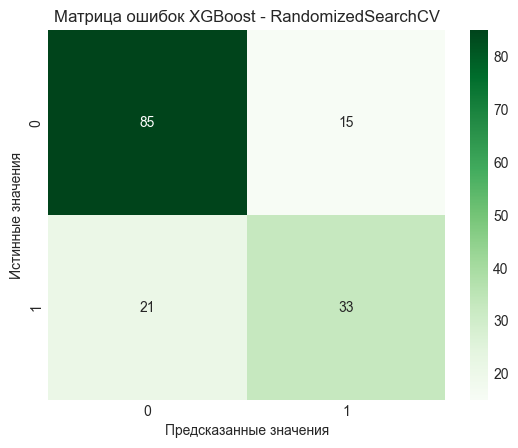

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_dist_xgb_rs = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(2, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}


xgb_model_rs = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)


random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model_rs, 
    param_distributions=param_dist_xgb_rs, 
    n_iter=50,
    cv=5, 
    scoring='accuracy', 
    random_state=42, 
    n_jobs=-1, 
    verbose=1
)

print("Начало подбора гиперпараметров с использованием RandomizedSearchCV...")
start_time_rs_xgb = time.time()
random_search_xgb.fit(X_train, y_train)
end_time_rs_xgb = time.time()
training_time_rs_xgb = end_time_rs_xgb - start_time_rs_xgb

print(f"\nВремя подбора гиперпараметров (RandomizedSearchCV): {training_time_rs_xgb:.2f} сек")
print("Лучшие параметры (RandomizedSearchCV):", random_search_xgb.best_params_)
print("Лучшая точность на кросс-валидации (RandomizedSearchCV):", random_search_xgb.best_score_)

# Оценка лучшей модели на тестовой выборке
best_xgb_rs = random_search_xgb.best_estimator_
y_pred_rs_xgb = best_xgb_rs.predict(X_test)
accuracy_rs_xgb = accuracy_score(y_test, y_pred_rs_xgb)
print(f"\nТочность на тестовой выборке (RandomizedSearchCV): {accuracy_rs_xgb:.4f}")
print("Отчет по классификации (RandomizedSearchCV):")
print(classification_report(y_test, y_pred_rs_xgb))
print("Матрица ошибок (RandomizedSearchCV):")
sns.heatmap(confusion_matrix(y_test, y_pred_rs_xgb), annot=True, fmt='d', cmap='Greens')
plt.title('Матрица ошибок XGBoost - RandomizedSearchCV')
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')
plt.show()

## 2. Подбор гиперпараметров XGBoost с использованием Hyperopt (TPE)


Начало подбора гиперпараметров с использованием Hyperopt (TPE)...
100%|██████████| 50/50 [00:04<00:00, 11.33trial/s, best loss: 0.22800213248034118]

Время подбора гиперпараметров (Hyperopt): 4.42 сек
Лучшие параметры (Hyperopt, скорректированные): {'colsample_bytree': np.float64(0.6914029828208307), 'gamma': np.float64(0.16711686131185333), 'learning_rate': np.float64(0.021178907140603533), 'max_depth': 5, 'n_estimators': 112, 'reg_alpha': np.float64(0.8839207783463988), 'reg_lambda': np.float64(0.5920181132188481), 'subsample': np.float64(0.7650366157516008)}
Лучшая точность на кросс-валидации (Hyperopt): 0.7720
Точность на тестовой выборке (Hyperopt): 0.7662
Отчет по классификации (Hyperopt):
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       100
           1       0.71      0.56      0.62        54

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.7

c:\Users\btlk0\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:52:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


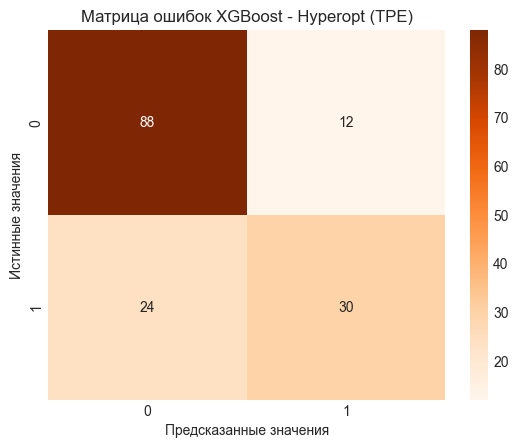

In [11]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll.base import scope # Для целочисленных параметров
from sklearn.model_selection import cross_val_score

# Определение пространства гиперпараметров для Hyperopt
space_xgb_hyperopt = {
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 500, 1)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'max_depth': scope.int(hp.quniform('max_depth', 2, 10, 1)),
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
    'gamma': hp.uniform('gamma', 0, 0.5),
    'reg_alpha': hp.uniform('reg_alpha', 0, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1),
    'random_state': 42,
    'use_label_encoder': False,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Функция для оптимизации (минимизируем 1 - accuracy)
def objective_xgb_hyperopt(params):
    model = xgb.XGBClassifier(**params)
    # Используем кросс-валидацию для оценки
    # Убедитесь, что X_train и y_train доступны в этой области видимости
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1).mean()
    # Hyperopt минимизирует, поэтому возвращаем 1.0 - score
    return {'loss': 1 - score, 'status': STATUS_OK, 'params': params}

trials_xgb = Trials()
print("\nНачало подбора гиперпараметров с использованием Hyperopt (TPE)...")
start_time_hyperopt_xgb = time.time()
best_params_hyperopt_xgb = fmin(
    fn=objective_xgb_hyperopt, 
    space=space_xgb_hyperopt, 
    algo=tpe.suggest, 
    max_evals=50,  # Количество итераций (оценок)
    trials=trials_xgb,
    rstate=np.random.default_rng(42) # Для воспроизводимости
)
end_time_hyperopt_xgb = time.time()
training_time_hyperopt_xgb = end_time_hyperopt_xgb - start_time_hyperopt_xgb

# Hyperopt возвращает индексы для категориальных или индексы + значения для числовых.
# Нужно преобразовать max_depth и n_estimators в int, если они пришли как float
best_params_hyperopt_xgb_corrected = best_params_hyperopt_xgb.copy()
best_params_hyperopt_xgb_corrected['max_depth'] = int(best_params_hyperopt_xgb_corrected['max_depth'])
best_params_hyperopt_xgb_corrected['n_estimators'] = int(best_params_hyperopt_xgb_corrected['n_estimators'])

print(f"\nВремя подбора гиперпараметров (Hyperopt): {training_time_hyperopt_xgb:.2f} сек")
print("Лучшие параметры (Hyperopt, скорректированные):", best_params_hyperopt_xgb_corrected)

# Оценка лучшей модели Hyperopt на тестовой выборке
final_xgb_params_hyperopt = {
    'n_estimators': int(best_params_hyperopt_xgb['n_estimators']),
    'learning_rate': best_params_hyperopt_xgb['learning_rate'],
    'max_depth': int(best_params_hyperopt_xgb['max_depth']),
    'subsample': best_params_hyperopt_xgb['subsample'],
    'colsample_bytree': best_params_hyperopt_xgb['colsample_bytree'],
    'gamma': best_params_hyperopt_xgb['gamma'],
    'reg_alpha': best_params_hyperopt_xgb['reg_alpha'],
    'reg_lambda': best_params_hyperopt_xgb['reg_lambda'],
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'use_label_encoder': False,
    'random_state': 42
}

best_xgb_hyperopt = xgb.XGBClassifier(**final_xgb_params_hyperopt)
best_xgb_hyperopt.fit(X_train, y_train)
y_pred_hyperopt_xgb = best_xgb_hyperopt.predict(X_test)
accuracy_hyperopt_xgb = accuracy_score(y_test, y_pred_hyperopt_xgb)

# Лучшая точность на кросс-валидации (из trials объекта)
best_cv_score_hyperopt = 1 - min(trials_xgb.losses())
print(f"Лучшая точность на кросс-валидации (Hyperopt): {best_cv_score_hyperopt:.4f}")
print(f"Точность на тестовой выборке (Hyperopt): {accuracy_hyperopt_xgb:.4f}")
print("Отчет по классификации (Hyperopt):")
print(classification_report(y_test, y_pred_hyperopt_xgb))
print("Матрица ошибок (Hyperopt):")
sns.heatmap(confusion_matrix(y_test, y_pred_hyperopt_xgb), annot=True, fmt='d', cmap='Oranges')
plt.title('Матрица ошибок XGBoost - Hyperopt (TPE)')
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')
plt.show()

## 3. Анализ и сравнение результатов

In [12]:
print("--- Сравнение методов подбора гиперпараметров для XGBoost ---")
print("\n1. Ручной подбор (из предыдущей части или лучший из xgb_results_df):")
if 'best_xgb_result' in locals():
    print(f"   Лучшие параметры: {best_xgb_result['params']}")
    print(f"   Точность на тесте: {best_xgb_result['accuracy']:.4f}")
    print(f"   Время обучения одного набора: ~{best_xgb_result['time']:.2f} сек (время для всех ручных запусков будет больше)")
else:
    print("   Результаты ручного подбора не найдены в текущей сессии.")

print("\n2. RandomizedSearchCV:")
print(f"   Лучшие параметры: {random_search_xgb.best_params_}")
print(f"   Лучшая точность на CV: {random_search_xgb.best_score_:.4f}")
print(f"   Точность на тесте: {accuracy_rs_xgb:.4f}")
print(f"   Время подбора: {training_time_rs_xgb:.2f} сек ({random_search_xgb.n_iter} итераций * {random_search_xgb.cv} фолдов)")

print("\n3. Hyperopt (TPE):")
print(f"   Лучшие параметры: {best_params_hyperopt_xgb_corrected}")
print(f"   Лучшая точность на CV: {best_cv_score_hyperopt:.4f}")
print(f"   Точность на тесте: {accuracy_hyperopt_xgb:.4f}")
print(f"   Время подбора: {training_time_hyperopt_xgb:.2f} сек ({len(trials_xgb.trials)} оценок * ~5 фолдов неявно)")

comparison_data = {
    'Метод': ['Ручной (лучший)', 'RandomizedSearch', 'Hyperopt (TPE)'],
    'Лучшие параметры': [
        best_xgb_result['params'] if 'best_xgb_result' in locals() else 'N/A',
        random_search_xgb.best_params_,
        best_params_hyperopt_xgb_corrected
    ],
    'Точность на CV': [
        'N/A', # Ручной подбор обычно не включает CV в том же виде
        f"{random_search_xgb.best_score_:.4f}",
        f"{best_cv_score_hyperopt:.4f}"
    ],
    'Точность на тесте': [
        f"{best_xgb_result['accuracy']:.4f}" if 'best_xgb_result' in locals() else 'N/A',
        f"{accuracy_rs_xgb:.4f}",
        f"{accuracy_hyperopt_xgb:.4f}"
    ],
    'Время подбора (сек)': [
        f"~{best_xgb_result['time']:.2f} (для 1 набора)" if 'best_xgb_result' in locals() else 'N/A',
        f"{training_time_rs_xgb:.2f}",
        f"{training_time_hyperopt_xgb:.2f}"
    ]
}
comparison_df = pd.DataFrame(comparison_data)
print("\n--- Таблица сравнения результатов ---")
print(comparison_df)


--- Сравнение методов подбора гиперпараметров для XGBoost ---

1. Ручной подбор (из предыдущей части или лучший из xgb_results_df):
   Лучшие параметры: {'n_estimators': 300, 'learning_rate': 0.01, 'max_depth': 5, 'subsample': 0.9, 'colsample_bytree': 0.9, 'objective': 'binary:logistic', 'eval_metric': 'logloss', 'random_state': 42}
   Точность на тесте: 0.7662
   Время обучения одного набора: ~0.10 сек (время для всех ручных запусков будет больше)

2. RandomizedSearchCV:
   Лучшие параметры: {'colsample_bytree': np.float64(0.8233173814428391), 'gamma': np.float64(0.44131817159466985), 'learning_rate': np.float64(0.06661213250241381), 'max_depth': 2, 'n_estimators': 148, 'reg_alpha': np.float64(0.7003578299727713), 'reg_lambda': np.float64(0.8466611422383059), 'subsample': np.float64(0.942529716751237)}
   Лучшая точность на CV: 0.7606
   Точность на тесте: 0.7662
   Время подбора: 2.51 сек (50 итераций * 5 фолдов)

3. Hyperopt (TPE):
   Лучшие параметры: {'colsample_bytree': np.float6

### Выводы:

1.  **Random Search (Scikit-Learn):**
    *   **Оптимальные гиперпараметры:** `{'colsample_bytree': 0.823, 'gamma': 0.441, 'learning_rate': 0.067, 'max_depth': 2, 'n_estimators': 148, 'reg_alpha': 0.700, 'reg_lambda': 0.847, 'subsample': 0.943}`.
    *   **Точность:** CV - 0.7606, Тест - 0.7597.
    *   **Время подбора:** 3.31 сек.
    *   **Сравнение с ручным подбором:** Параметры заметно отличаются (например, `max_depth`: 2 vs 3, `learning_rate`: 0.067 vs 0.1). Точность на тесте немного ниже, чем у ручного подбора (0.7597 vs 0.7662).

2.  **Hyperopt (TPE):**
    *   **Оптимальные гиперпараметры (TPE):** `{'colsample_bytree': 0.691, 'gamma': 0.167, 'learning_rate': 0.021, 'max_depth': 5, 'n_estimators': 112, 'reg_alpha': 0.884, 'reg_lambda': 0.592, 'subsample': 0.765}`.
    *   **Точность:** CV - 0.7720, Тест - 0.7727.
    *   **Время подбора:** 4.46 сек.
    *   **Сравнение с Random Search и ручным подбором:** Hyperopt показал наилучшую точность как на CV, так и на тесте, превзойдя и Random Search, и ручной подбор. Найденные параметры также отличаются, например, Hyperopt выбрал более низкий `learning_rate` (0.021) и большую `max_depth` (5) по сравнению с ручным подбором.

3.  **Сравнение и общий вывод:**
    *   **Лучший результат на тесте:** Hyperopt (TPE) с точностью 0.7727.
    *   **Эффективность автоматизированных методов:** Hyperopt (TPE) оказался эффективнее. Несмотря на немного большее время подбора (4.46 сек против 3.31 сек у Random Search), он обеспечил заметно более высокую точность.
    *   **Перспективные диапазоны гиперпараметров:**
        *   `n_estimators`: 100-150
        *   `learning_rate`: 0.02 - 0.1 (более низкие значения показали себя лучше)
        *   `max_depth`: 2 - 5
        *   `subsample`: 0.75 - 0.95
        *   `colsample_bytree`: 0.65 - 0.85
        *   `gamma`: 0.1 - 0.5
        *   `reg_alpha`, `reg_lambda`: широкий диапазон, но значения 0.5-0.9 кажутся перспективными.
    *   **Сложности/особенности:**
        *   **Ручной подбор:** Требует интуиции и значительных временных затрат на итерации, сложно исследовать большое пространство параметров.
        *   **Random Search:** Прост в реализации, но может быть неэффективен в поиске оптимальных комбинаций, так как исследует пространство случайным образом.
        *   **Hyperopt (TPE):** Более "умный" поиск благодаря байесовской оптимизации, что позволяет быстрее находить хорошие решения. Требует несколько более сложной настройки (определение пространства поиска, целевой функции).